In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [6]:
import os
os.chdir(r"C:\Users\hanis\OneDrive\Desktop\Kamakshigari Hanish FWI")

import pandas as pd
data = pd.read_csv("train_data.csv")



In [7]:
data = data.drop(['Unnamed: 0','wind_direction','snow_on_ground','daily_severity_rating',
                  'latitude','longitude','elevation','visibility'], axis=1, errors='ignore')
data


,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,27-08-2019 12:00,12.0,7.6,74.4,12.0,1015.13,2.60,0,64.1,6.9,51.1,10.3,0.9,0.6,United Kingdom
1,06-06-2018 12:00,11.1,1.7,52.0,22.1,1010.80,1.50,0,66.2,14.8,104.2,21.9,1.7,2.7,Canada
2,11-10-2014 12:00,2.9,2.3,95.0,1.9,1018.19,0.00,2,44.3,3.1,330.1,6.1,0.1,0.0,Canada
3,11-09-2015 12:00,22.1,11.1,49.8,9.5,1015.79,0.00,4,85.8,11.4,282.9,20.7,3.8,6.3,Canada
4,22-06-2016 12:00,17.0,10.0,63.6,35.2,1016.70,0.00,1,86.6,107.4,482.9,138.1,15.6,47.7,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,02-10-2017 12:00,11.1,-0.8,44.0,19.6,1030.60,0.00,2,86.3,8.3,205.3,15.1,6.8,8.9,Canada
1048571,20-09-2014 12:00,9.2,4.1,70.0,9.3,1017.10,0.00,1,78.7,4.8,190.9,9.1,1.6,0.9,Canada
1048572,16-09-2019 12:00,16.0,11.0,72.4,11.1,1006.10,0.00,1,75.3,9.6,250.3,17.4,1.4,1.5,Canada
1048573,14-07-2018 12:00,26.1,21.7,76.8,14.8,1019.10,9.42,0,59.1,15.0,86.8,20.9,0.8,0.8,United States


In [8]:
data.columns

Index(['report_date', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'atmospheric_pressure',
       'precipitation', 'rain_days', 'fine_fuel_moisture_code',
       'duff_moisture_code', 'drought_code', 'build_up_index',
       'initial_spread_index', 'fire_weather_index', 'country'],
      dtype='object')

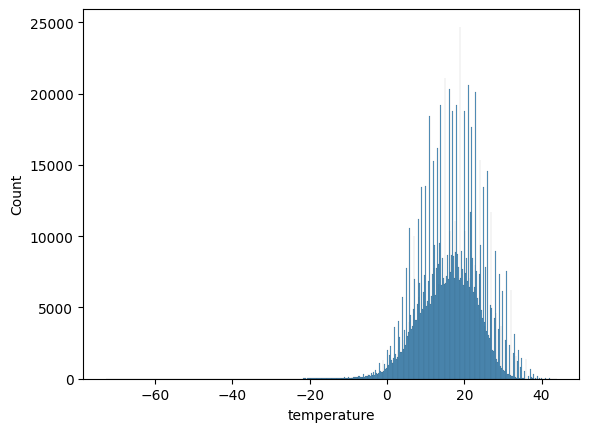

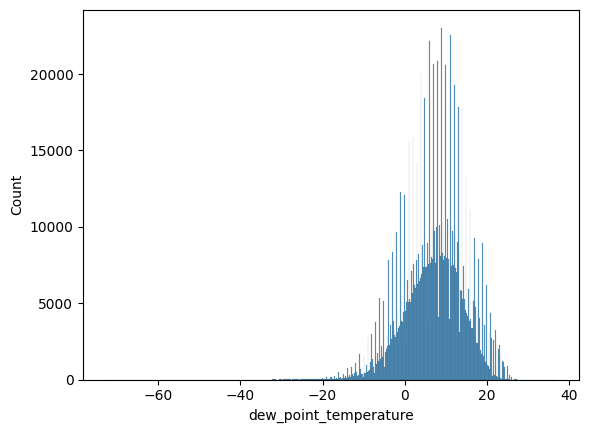

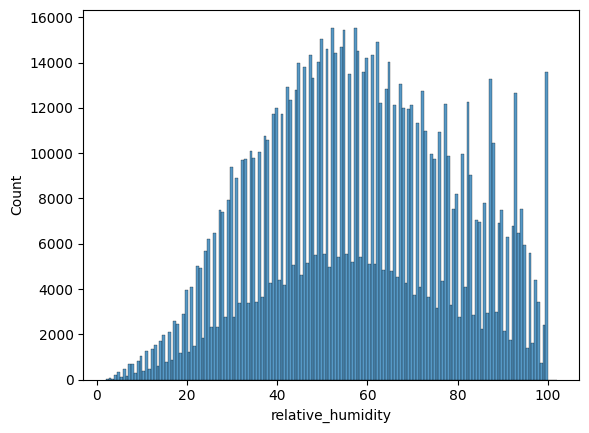

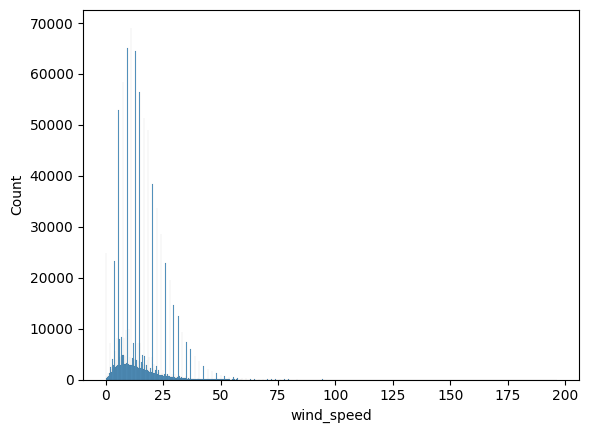

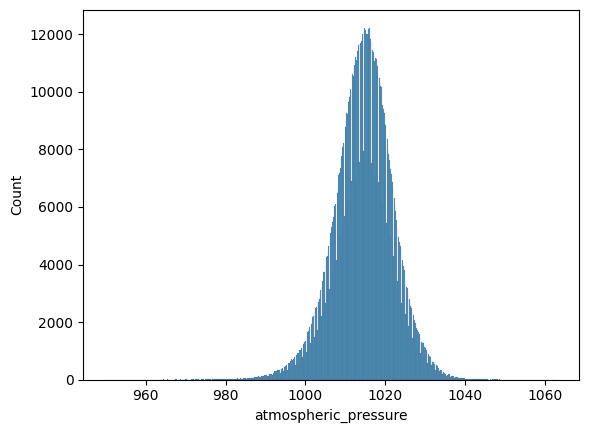

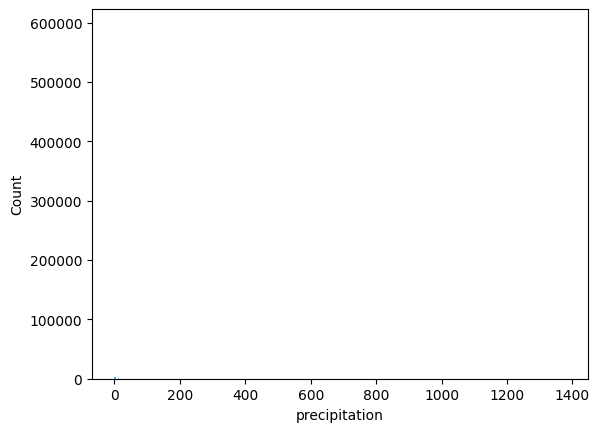

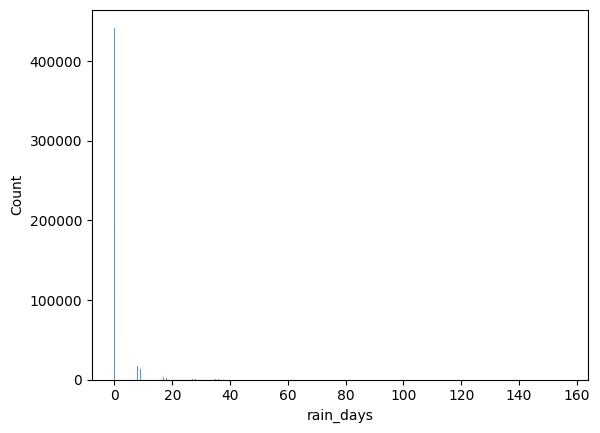

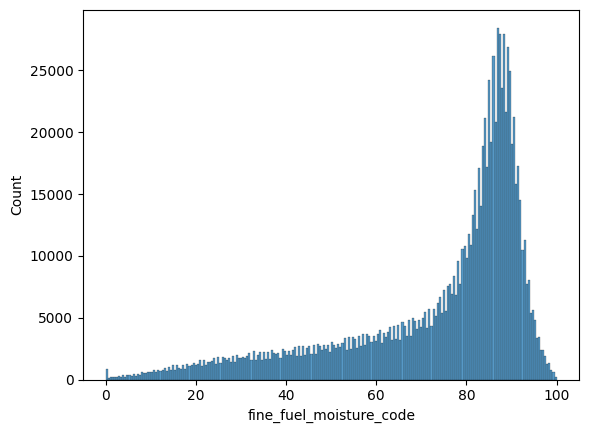

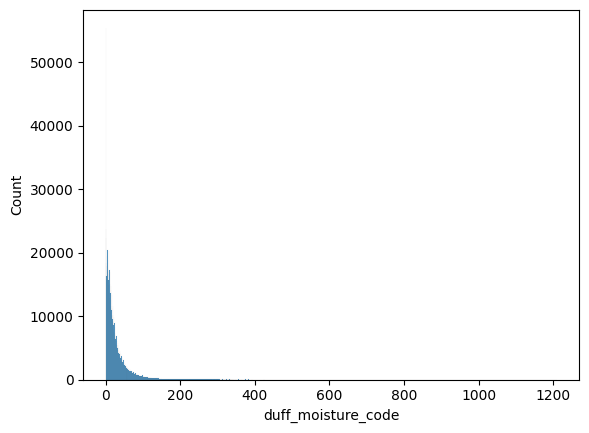

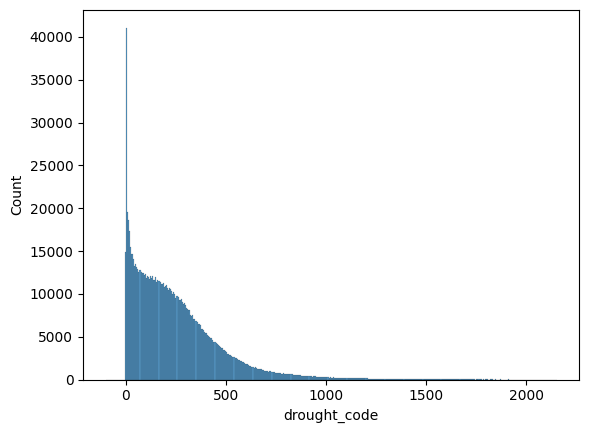

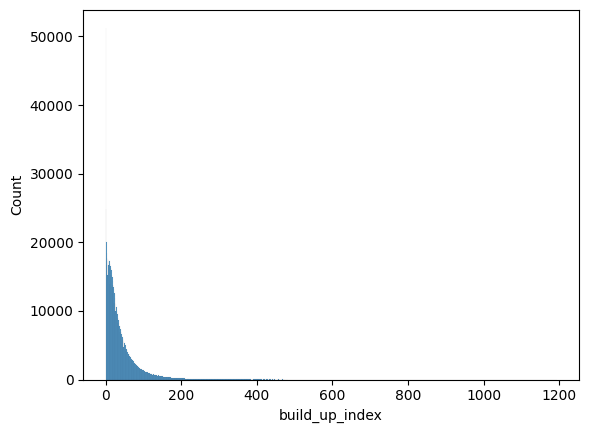

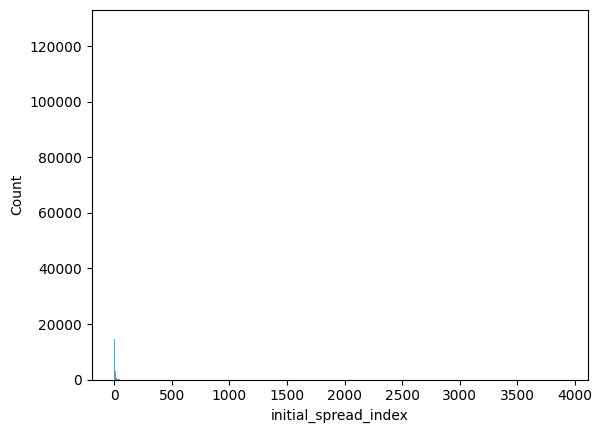

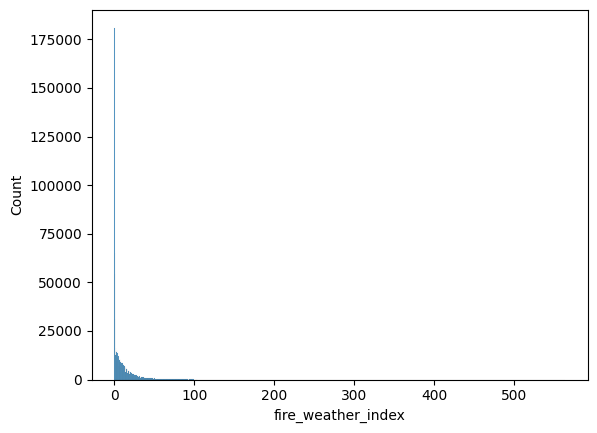

In [9]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.histplot(data = data, x = col)
        plt.show()

In [10]:
non_nd_col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']

In [11]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
lambda_values = {}

for col in non_nd_col:
    transformed = pt.fit_transform(data[col].values.reshape(-1, 1))
    data[col + '_transformed'] = transformed.flatten()
    lambda_values[col] = pt.lambdas_[0]

for col, lam in lambda_values.items():
    print(f"Column: {col}, Lambda: {lam}")


Column: fine_fuel_moisture_code, Lambda: 2.664180052624969
Column: duff_moisture_code, Lambda: 0.07498635059830464
Column: drought_code, Lambda: 0.45509839304504895
Column: build_up_index, Lambda: 0.14483813511522003
Column: initial_spread_index, Lambda: -0.13650931596124657
Column: fire_weather_index, Lambda: -0.038055775682903886
Column: wind_speed, Lambda: 0.4285211484204733


In [12]:
data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,27-08-2019 12:00,12.0,7.6,74.4,12.0,1015.13,2.60,0,64.1,6.9,...,0.9,0.6,United Kingdom,25476.298144,2.235636,11.083490,2.905153,0.614538,0.465825,4.670875
1,06-06-2018 12:00,11.1,1.7,52.0,22.1,1010.80,1.50,0,66.2,14.8,...,1.7,2.7,Canada,27724.984636,3.066387,16.088340,3.961826,0.928858,1.276296,6.627555
2,11-10-2014 12:00,2.9,2.3,95.0,1.9,1018.19,0.00,2,44.3,3.1,...,0.1,0.0,Canada,9695.348167,1.488335,28.614970,2.266637,0.094693,-0.000000,1.349167
3,11-09-2015 12:00,22.1,11.1,49.8,9.5,1015.79,0.00,4,85.8,11.4,...,3.8,6.3,Canada,54827.575038,2.771048,26.532058,3.877445,1.412044,1.914544,4.058278
4,22-06-2016 12:00,17.0,10.0,63.6,35.2,1016.70,0.00,1,86.6,107.4,...,15.6,47.7,United States,56184.202164,5.614588,34.423038,7.206572,2.333427,3.612039,8.529832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,02-10-2017 12:00,11.1,-0.8,44.0,19.6,1030.60,0.00,2,86.3,8.3,...,6.8,8.9,Canada,55673.039130,2.427309,22.646562,3.421250,1.791261,2.195376,6.198330
1048571,20-09-2014 12:00,9.2,4.1,70.0,9.3,1017.10,0.00,1,78.7,4.8,...,1.6,0.9,Canada,43677.726680,1.878977,21.841787,2.746936,0.895818,0.634078,4.005819
1048572,16-09-2019 12:00,16.0,11.0,72.4,11.1,1006.10,0.00,1,75.3,9.6,...,1.4,1.5,Canada,38888.085102,2.582724,24.980732,3.622894,0.825178,0.900499,4.458807
1048573,14-07-2018 12:00,26.1,21.7,76.8,14.8,1019.10,9.42,0,59.1,15.0,...,0.8,0.8,United States,20590.666066,3.081865,14.643985,3.891781,0.564823,0.581261,5.281529


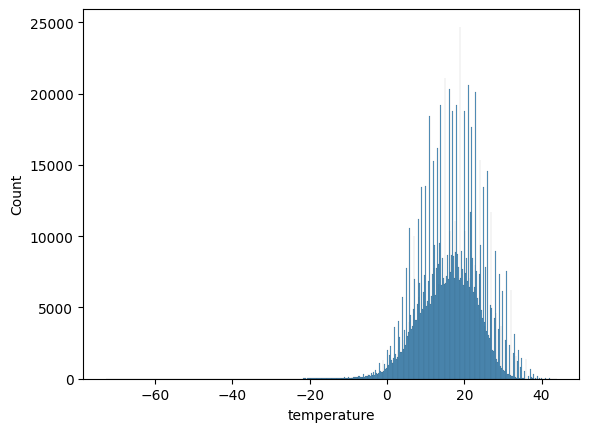

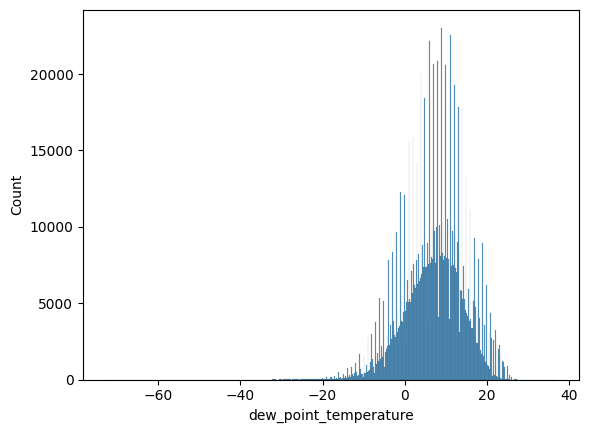

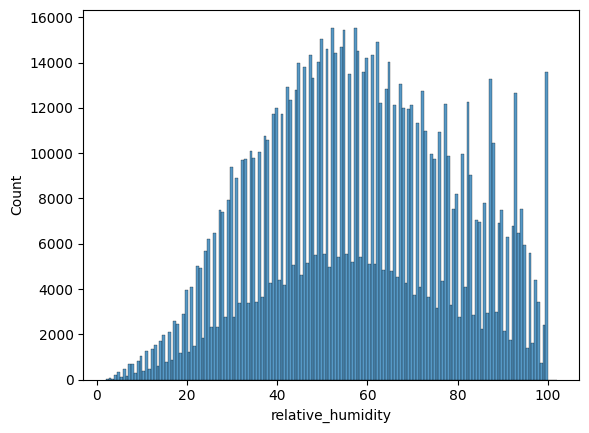

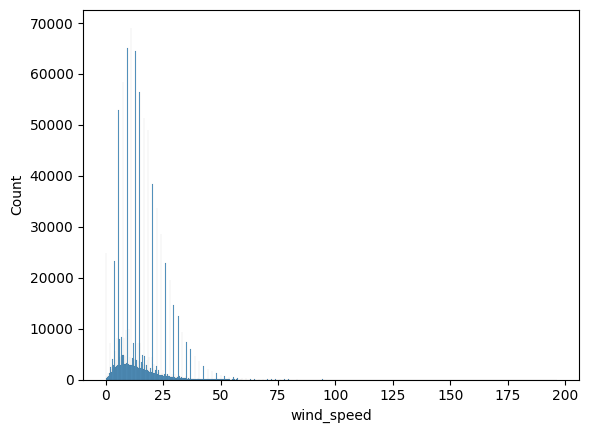

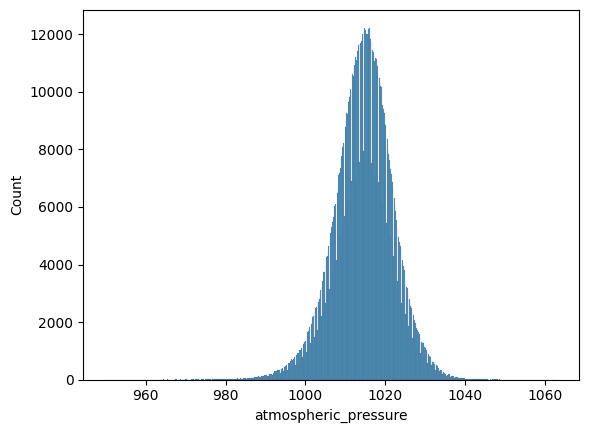

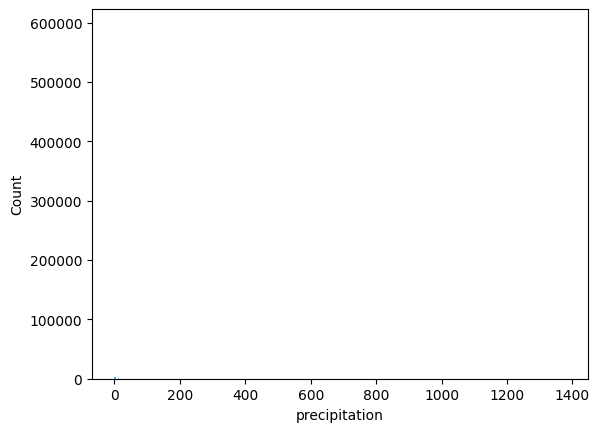

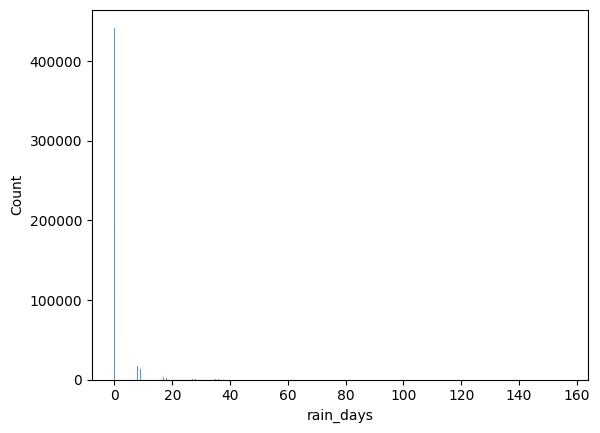

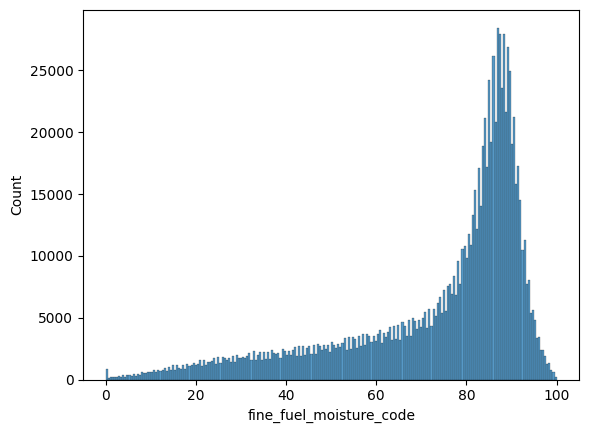

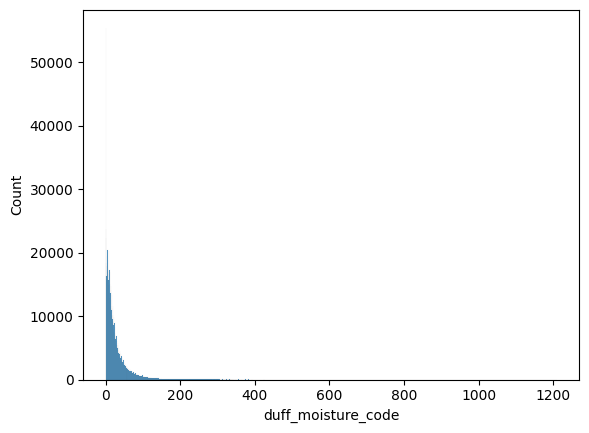

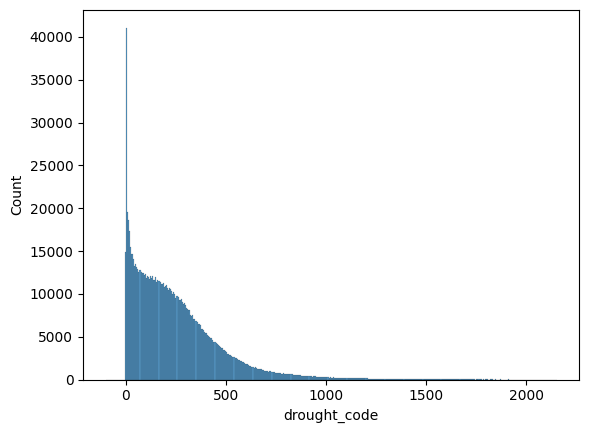

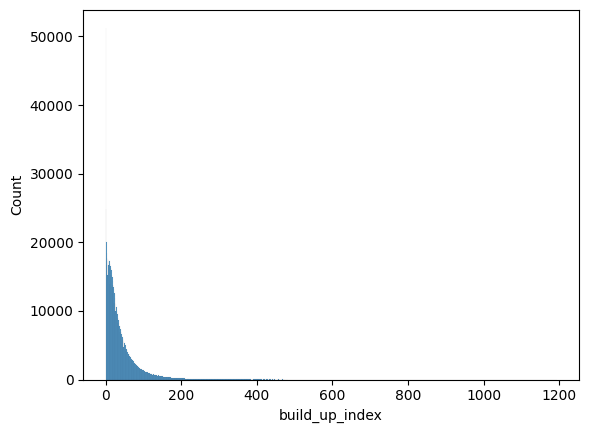

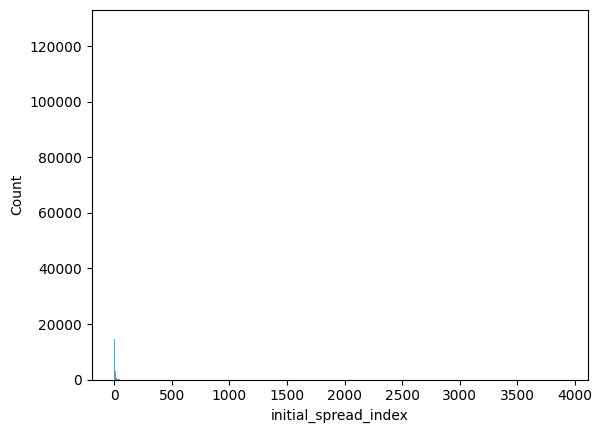

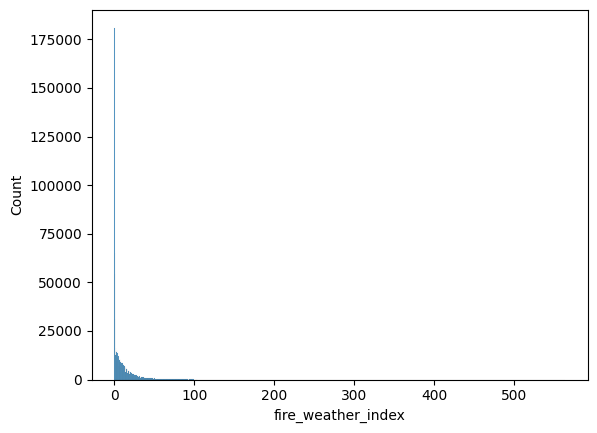

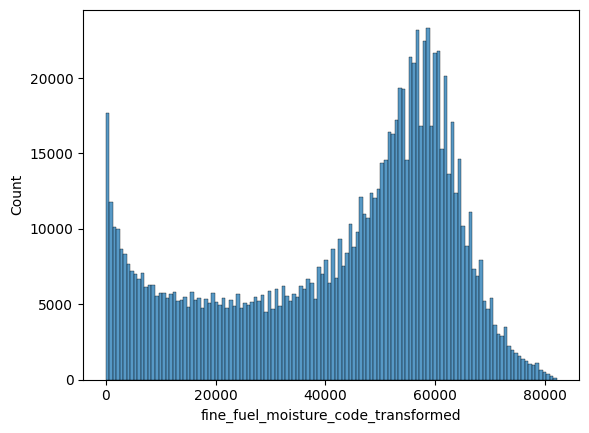

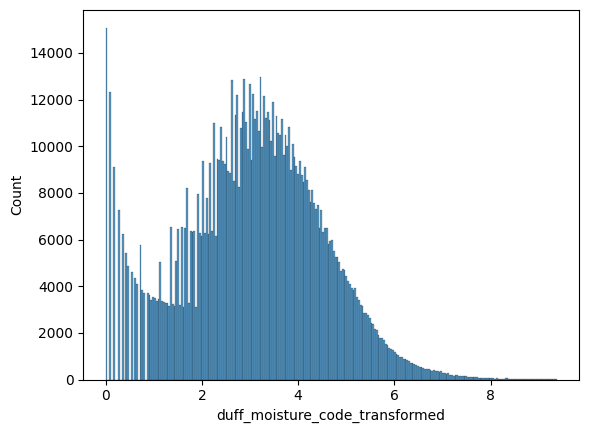

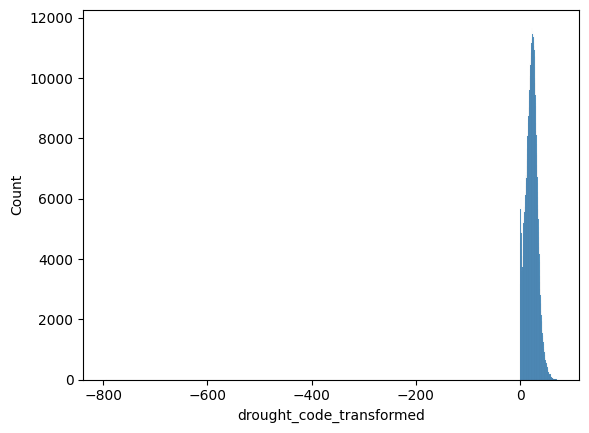

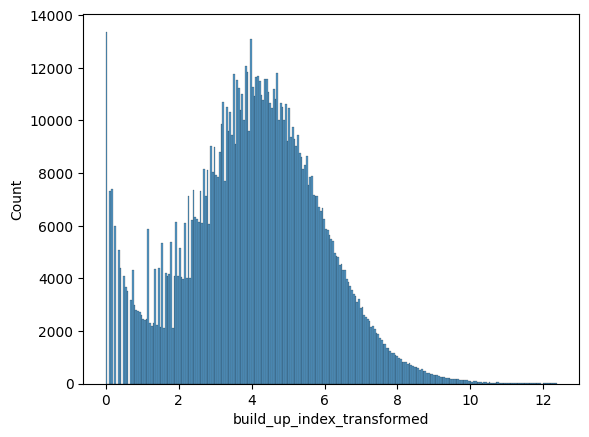

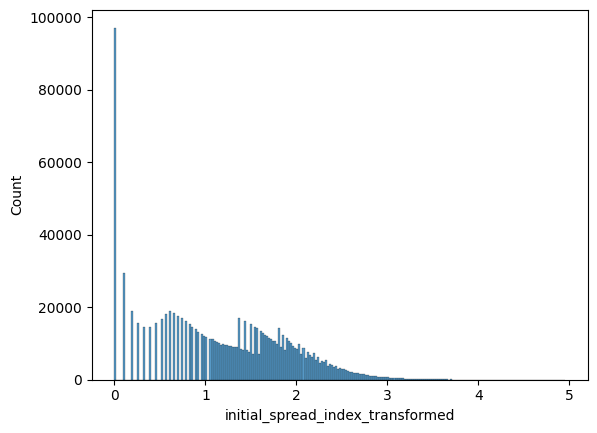

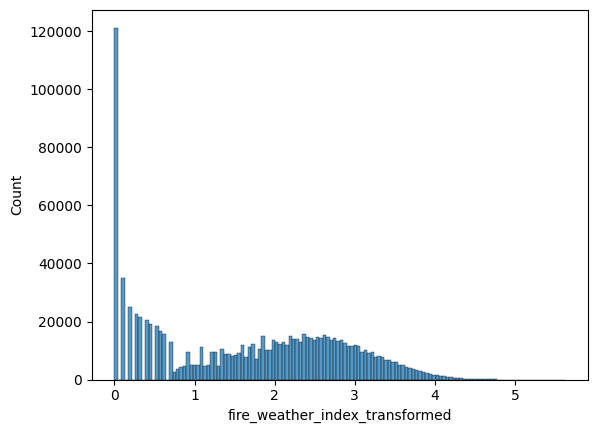

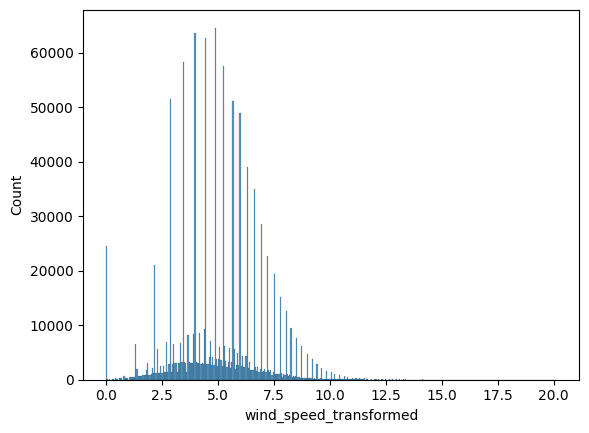

In [13]:
for col in data.columns:
    if data[col].dtypes != 'object':
        sns.histplot(data = data, x = col)
        plt.show()

In [14]:
# Select numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean and std for each numeric column
mean_std_dict = {}

for col in num_cols:
    mean_std_dict[col] = {
        'mean': data[col].mean(),
        'std': data[col].std()
    }

mean_std_dict

{'temperature': {'mean': np.float64(16.691147605083092),
  'std': np.float64(7.8793864829712605)},
 'dew_point_temperature': {'mean': np.float64(7.2634643206256095),
  'std': np.float64(7.349044794853967)},
 'relative_humidity': {'mean': np.float64(58.201053238919485),
  'std': np.float64(21.229573718933487)},
 'wind_speed': {'mean': np.float64(15.048940228405218),
  'std': np.float64(9.475598476590525)},
 'atmospheric_pressure': {'mean': np.float64(1014.5486063848554),
  'std': np.float64(7.405712040554618)},
 'precipitation': {'mean': np.float64(2.5119668979329077),
  'std': np.float64(7.2422517714207055)},
 'rain_days': {'mean': np.float64(2.5076098514650838),
  'std': np.float64(4.620052652282253)},
 'fine_fuel_moisture_code': {'mean': np.float64(73.61092358677251),
  'std': np.float64(20.698460267145897)},
 'duff_moisture_code': {'mean': np.float64(27.95240874520182),
  'std': np.float64(43.17761906439381)},
 'drought_code': {'mean': np.float64(248.08931425982883),
  'std': np.flo

In [15]:
scaler = StandardScaler()

for col in data.columns:
    if data[col].dtype != 'object':
        # Reshape the column to 2D array for scaler
        col_values = data[col].values.reshape(-1, 1)
        
        # Fit and transform
        scaled = scaler.fit_transform(col_values)
        
        # Flatten back to 1D and assign
        data[col] = scaled.flatten()


In [16]:
data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,27-08-2019 12:00,-0.595370,0.045793,0.763037,-0.321768,0.078506,0.012155,-0.542767,-0.459499,-0.487577,...,-0.445001,-0.664276,United Kingdom,-0.805104,-0.581964,-0.969122,-0.611530,-0.812002,-1.025961,-0.169452
1,06-06-2018 12:00,-0.709592,-0.757033,-0.292095,0.744129,-0.506178,-0.139731,-0.542767,-0.358042,-0.304612,...,-0.365949,-0.531870,Canada,-0.697568,-0.010328,-0.524941,-0.048793,-0.395688,-0.340398,0.836853
2,11-10-2014 12:00,-1.750283,-0.675389,1.733382,-1.387664,0.491701,-0.346849,-0.109871,-1.416093,-0.575586,...,-0.524053,-0.702106,Canada,-1.559772,-1.096178,0.586801,-0.951576,-1.500533,-1.419994,-1.877780
3,11-09-2015 12:00,0.686456,0.522046,-0.395724,-0.585603,0.167627,-0.346849,0.323025,0.588888,-0.383356,...,-0.158438,-0.304888,Canada,0.598517,-0.213550,0.401942,-0.093731,0.244288,0.199483,-0.484506
4,22-06-2016 12:00,0.039198,0.372366,0.254313,2.126628,0.290505,-0.346849,-0.326319,0.627539,1.840019,...,1.007576,2.305401,United States,0.663392,1.743078,1.102269,1.679214,1.464653,1.635363,1.815180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,02-10-2017 12:00,-0.709592,-1.097213,-0.668928,0.480293,2.167435,-0.346849,-0.109871,0.613045,-0.455153,...,0.138006,-0.140957,Canada,0.638948,-0.450075,0.057103,-0.336680,0.746558,0.437034,0.616106
1048571,20-09-2014 12:00,-0.950728,-0.430459,0.555779,-0.606710,0.344517,-0.346849,-0.326319,0.245868,-0.536213,...,-0.375831,-0.645361,Canada,0.065315,-0.827380,-0.014321,-0.695790,-0.439449,-0.883639,-0.511485
1048572,16-09-2019 12:00,-0.087716,0.508439,0.668829,-0.416749,-1.140824,-0.346849,-0.326319,0.081604,-0.425045,...,-0.395594,-0.607531,Canada,-0.163733,-0.343134,0.264262,-0.229294,-0.533011,-0.658278,-0.278516
1048573,14-07-2018 12:00,1.194110,1.964411,0.876087,-0.026272,0.614579,0.953852,-0.542767,-0.701063,-0.299980,...,-0.454882,-0.651666,United States,-1.038742,0.000323,-0.653127,-0.086096,-0.877849,-0.928315,0.144603


In [17]:
df_sample = data.sample(n= 5000,random_state= 42 )
df_sample

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
781974,13-06-2013 12:00,-0.341543,-0.063065,0.183656,-1.588179,0.050150,-0.346849,-0.326319,-1.213179,-0.533897,...,-0.524053,-0.695801,Canada,-1.436227,-0.813951,-0.491651,-0.710657,-1.500533,-1.339519,-2.571646
937737,05-11-2010 12:00,-1.445690,-0.498496,1.403653,-0.997187,-0.168601,-0.250194,-0.542767,-0.387030,-0.619590,...,-0.464764,-0.689496,Canada,-0.728873,-1.561402,0.372722,-1.445629,-0.947991,-1.266305,-1.077604
907828,23-10-2018 12:00,-0.849197,-0.444067,0.395625,0.754682,0.033946,-0.345468,-0.109871,0.226542,-0.570954,...,-0.237490,-0.563395,United States,0.037502,-1.059683,-0.206800,-0.931885,0.046906,-0.457564,0.845392
784628,26-07-2019 12:00,0.775296,1.406515,0.649987,0.100369,1.424765,-0.346849,0.106577,0.530913,-0.415781,...,-0.089268,-0.285973,Canada,0.503052,-0.312668,-0.172598,-0.233717,0.388495,0.231044,0.269405
662460,28-09-2017 12:00,-0.671518,-0.144708,0.584042,0.174243,0.722604,-0.346849,-0.326319,-0.541631,-0.614958,...,-0.425238,-0.676886,Canada,-0.888034,-1.497676,-0.288758,-1.391534,-0.691388,-1.137193,0.339890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214253,10-06-2010 12:00,0.089963,-0.103886,-0.433408,-0.606710,-0.330638,-0.346849,-0.326319,0.255530,-0.485261,...,-0.375831,-0.632751,Canada,0.079308,-0.571853,-0.903373,-0.585143,-0.439449,-0.801180,-0.511485
357622,20-10-2011 12:00,-1.001493,-0.199137,1.073924,1.345674,0.317511,-0.255717,-0.542767,-0.459499,-0.626538,...,-0.326423,-0.664276,Canada,-0.805104,-1.667838,-1.634107,-1.687251,-0.237407,-1.025961,1.293650
621800,25-06-2016 12:00,1.942900,1.869160,-0.282674,1.736151,-0.630406,-0.312329,-0.542767,0.738658,0.096059,...,1.224968,1.309204,United States,0.855466,0.633220,0.072121,0.594230,1.576036,1.347061,1.562918
744048,23-06-2018 12:00,1.308332,-0.035850,-1.417884,-0.997187,0.263499,-0.346849,0.539472,0.946403,1.538937,...,0.345517,1.384864,United States,1.237079,1.618762,1.522203,1.673725,0.981278,1.373573,-1.077604


In [18]:
data.columns

Index(['report_date', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'atmospheric_pressure',
       'precipitation', 'rain_days', 'fine_fuel_moisture_code',
       'duff_moisture_code', 'drought_code', 'build_up_index',
       'initial_spread_index', 'fire_weather_index', 'country',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed'],
      dtype='object')

In [19]:
New_data = data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [20]:
New_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,-0.595370,0.045793,0.763037,0.078506,0.012155,-0.542767,United Kingdom,-0.805104,-0.581964,-0.969122,-0.611530,-0.812002,-1.025961,-0.169452
1,-0.709592,-0.757033,-0.292095,-0.506178,-0.139731,-0.542767,Canada,-0.697568,-0.010328,-0.524941,-0.048793,-0.395688,-0.340398,0.836853
2,-1.750283,-0.675389,1.733382,0.491701,-0.346849,-0.109871,Canada,-1.559772,-1.096178,0.586801,-0.951576,-1.500533,-1.419994,-1.877780
3,0.686456,0.522046,-0.395724,0.167627,-0.346849,0.323025,Canada,0.598517,-0.213550,0.401942,-0.093731,0.244288,0.199483,-0.484506
4,0.039198,0.372366,0.254313,0.290505,-0.346849,-0.326319,United States,0.663392,1.743078,1.102269,1.679214,1.464653,1.635363,1.815180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,-0.709592,-1.097213,-0.668928,2.167435,-0.346849,-0.109871,Canada,0.638948,-0.450075,0.057103,-0.336680,0.746558,0.437034,0.616106
1048571,-0.950728,-0.430459,0.555779,0.344517,-0.346849,-0.326319,Canada,0.065315,-0.827380,-0.014321,-0.695790,-0.439449,-0.883639,-0.511485
1048572,-0.087716,0.508439,0.668829,-1.140824,-0.346849,-0.326319,Canada,-0.163733,-0.343134,0.264262,-0.229294,-0.533011,-0.658278,-0.278516
1048573,1.194110,1.964411,0.876087,0.614579,0.953852,-0.542767,United States,-1.038742,0.000323,-0.653127,-0.086096,-0.877849,-0.928315,0.144603


In [21]:
New_data.to_csv('trained_data.csv', index=False)